In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt
import joblib

In [3]:
df = pd.read_csv('personality_synthetic_dataset.csv')

In [4]:
X = df.drop('personality_type', axis=1)
y = df['personality_type']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
dbscan = DBSCAN(eps=1.5, min_samples=3)
clusters = dbscan.fit_predict(X_scaled)

In [7]:
df['Cluster'] = clusters

In [8]:
ari = metrics.adjusted_rand_score(y, clusters)
homogeneity = metrics.homogeneity_score(y, clusters)
completeness = metrics.completeness_score(y, clusters)
v_measure = metrics.v_measure_score(y, clusters)

In [9]:
print("Adjusted Rand Index (ARI):", ari)
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-Measure:", v_measure)

Adjusted Rand Index (ARI): 0.0
Homogeneity Score: 0.0
Completeness Score: 1.0
V-Measure: 0.0


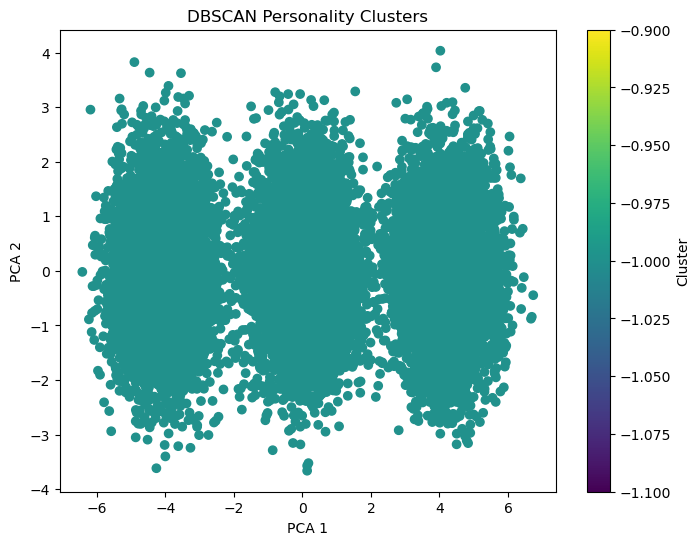

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Personality Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [12]:
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(dbscan, 'dbscan_model.joblib')
print("Model and scaler saved successfully!")

Model and scaler saved successfully!
